In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import yfinance as yf
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
# pyfolio  qgrid empyrical
import pickle
import numpy as np
import time

import seaborn as sns
from itertools import combinations
import multiprocessing as mp
from tqdm import tqdm
import sys

import TradingRefact as td 
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
with open('C:\\Users\\Rafael\\Trading\\Trading\\ibov.pkl','rb') as file:
     data =pickle.load(file)
data1 =data['Adj Close']
data1.drop('MGLU3.SA',axis=1,inplace=True)

C:\Users\Rafael\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)

In [33]:
data2 =data1.fillna(method='ffill')[data1.index>='2019-01-01'].dropna(how='any',axis=1)

In [3]:
import statsmodels.tsa.stattools as ts 


In [35]:
pares=[ i for i in    combinations(data2.columns,2)]

In [39]:
len(pares)

2346

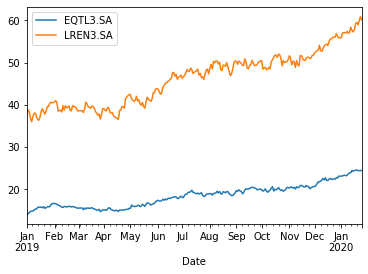

In [48]:
data2[['EQTL3.SA' , 'LREN3.SA']].plot()

In [40]:
dic={}
for i in tqdm(pares):
    dic[i]=ts.coint(data2[i[0]] ,data2[i[1]] )[1]

100%|██████████████████████████████████████████████████████████████████████████████| 2346/2346 [00:27<00:00, 86.13it/s]


In [51]:
d=pd.Series(dic).sort_values()

In [60]:
with pd.option_context('display.max_rows', 50, 'display.max_columns', None):
    print(d)

PETR4.SA  ^N225       8.891220e-08
PETR3.SA  ^N225       1.857278e-05
ELET3.SA  ELET6.SA    3.087746e-05
GNDI3.SA  QUAL3.SA    4.153953e-05
EQTL3.SA  LREN3.SA    5.447274e-05
                          ...     
CYRE3.SA  UGPA3.SA    1.000000e+00
GGBR4.SA  PCAR4.SA    1.000000e+00
GOAU4.SA  ITUB4.SA    1.000000e+00
ECOR3.SA  SUZB3.SA    1.000000e+00
RADL3.SA  UGPA3.SA    1.000000e+00
Length: 2346, dtype: float64


In [27]:

[print(ts.coint(data2[i[0]] ,data2[i[1]] )) for i in pares ]

MissingDataError: exog contains inf or nans

In [19]:
result

(-0.9545790489262789,
 0.9111286073148883,
 array([-3.90064428, -3.33847383, -3.04607663]))